In [25]:
import json
import random

from IPython.display import Audio, display
import matplotlib.pyplot as plt

import sys
import os

sys.path.append(os.path.abspath('../../'))

with open('config.json') as f:
    cfg = json.load(f)

class Config:
    def __init__(self, dictionary):
        for k, v in dictionary.items():
            if isinstance(v, dict):
                setattr(self, k, Config(v))
            else:
                setattr(self, k, v)

cfg = Config(cfg)

In [26]:
from dataset.dataset import SpeechCommandsDataset, get_loader

train_dataset = SpeechCommandsDataset(
    root_dir=cfg.data.root,
    cfg=cfg,
    mode='training'
)

Sample 16: Label = 1, Shape = (1, 16000)


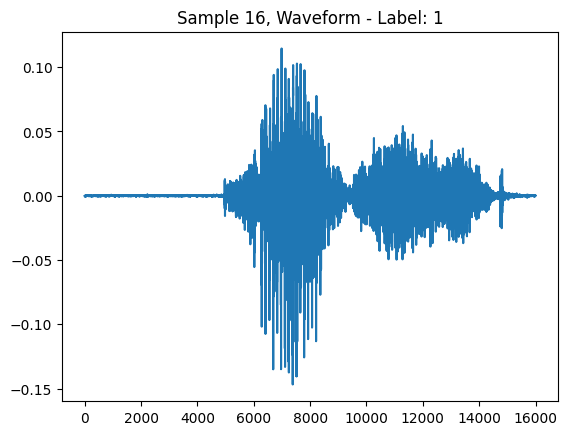

In [27]:
# Test single sample
sample_idx = 16
waveform, label = train_dataset[sample_idx]
print(f"Sample {sample_idx}: Label = {label}, Shape = {waveform.shape}")
plt.plot(waveform.squeeze())
plt.title(f"Sample {sample_idx}, Waveform - Label: {label}")
plt.show()

In [ ]:
def show_representation(dataset, idx):
    waveform, label = dataset[idx]

    plt.figure(figsize=(8, 8))
    print(waveform.shape)
    if dataset.cfg.data.representation == 'waveform':
        plt.plot(waveform.squeeze())
        plt.title(f"Sample {idx}, Waveform - Label: {label}")
    else:
        plt.imshow(waveform.squeeze(), aspect='auto', origin='lower')
        plt.title(f"Sample {idx}, {dataset.cfg.data.representation} - Label: {label}")
        plt.colorbar()

    plt.show()

    if hasattr(dataset, '_load_audio'):
        audio_path = dataset.filepaths[idx]
        display(Audio(audio_path))

# Test different representations
print("\nTesting representations:")
for rep in ['waveform', 'spectrogram', 'melspectrogram', 'mfcc']:
    cfg.data.representation = rep
    test_dataset = SpeechCommandsDataset(cfg.data.root, cfg, 'training')
    print(f"\n{rep.upper()} representation:")
    show_representation(test_dataset, random.randint(0, len(test_dataset) - 1))

IndentationError: unexpected indent (1817946406.py, line 4)

Batch shapes - Inputs: torch.Size([32, 1, 80, 80]), Labels: torch.Size([32])


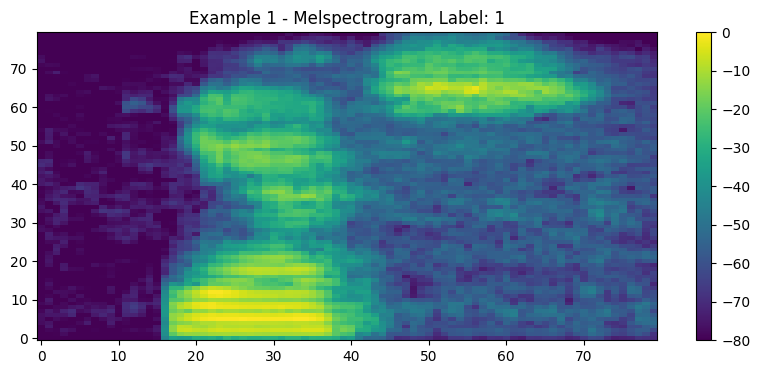

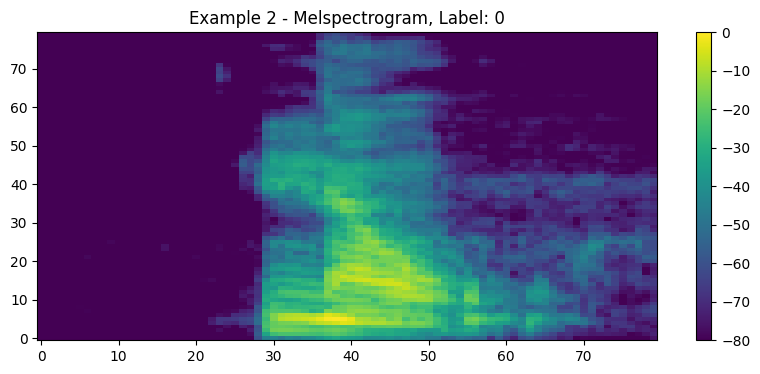

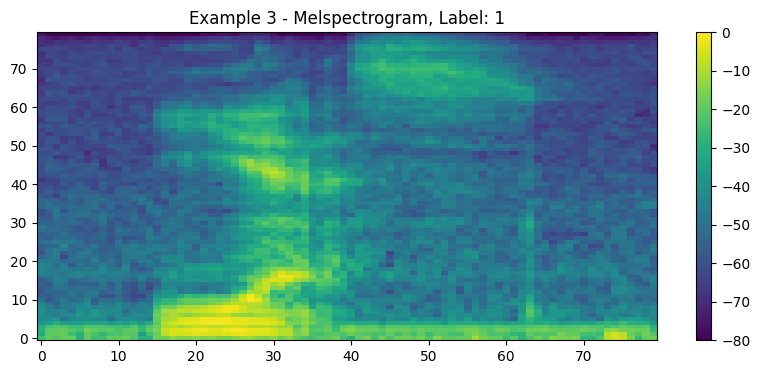

In [29]:
# Test data loader
cfg.data.representation = 'melspectrogram'
train_loader, val_loader, test_loader = get_loader(cfg)

for batch in train_loader:
    inputs, labels = batch
    print(f"Batch shapes - Inputs: {inputs.shape}, Labels: {labels.shape}")

    for i in range(min(3, len(inputs))):
        plt.figure(figsize=(10, 4))
        if cfg.data.representation == 'waveform':
            plt.plot(inputs[i].squeeze().numpy())
            plt.title(f"Example {i + 1} - Waveform, Label: {labels[i].item()}")
        else:
            plt.imshow(inputs[i].squeeze().numpy(), aspect='auto', origin='lower')
            plt.title(f"Example {i + 1} - {cfg.data.representation.capitalize()}, Label: {labels[i].item()}")
            plt.colorbar()
        plt.show()
    break

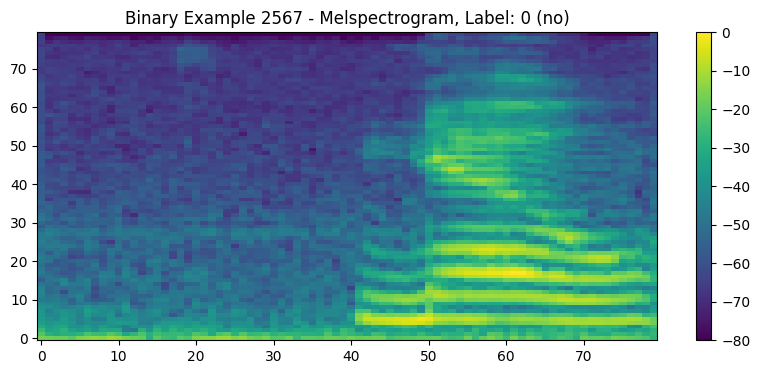

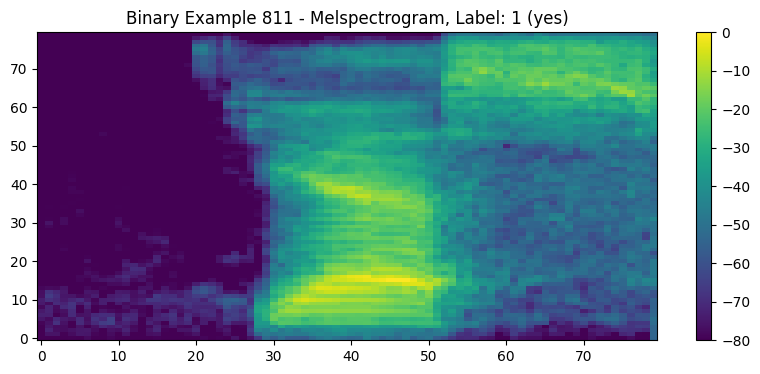

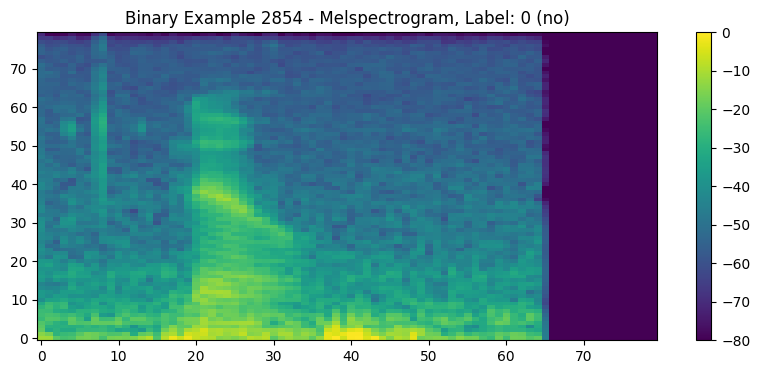

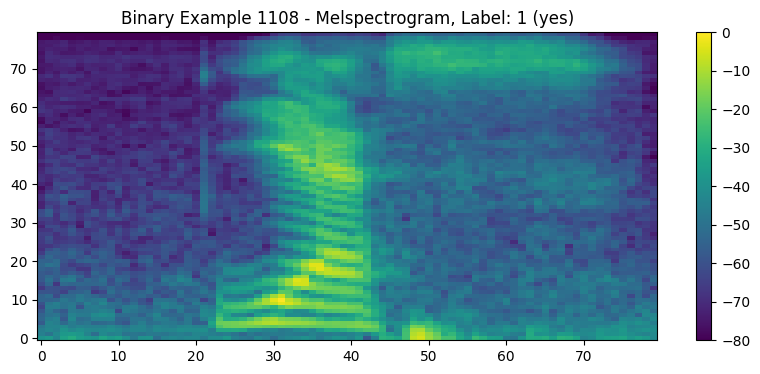

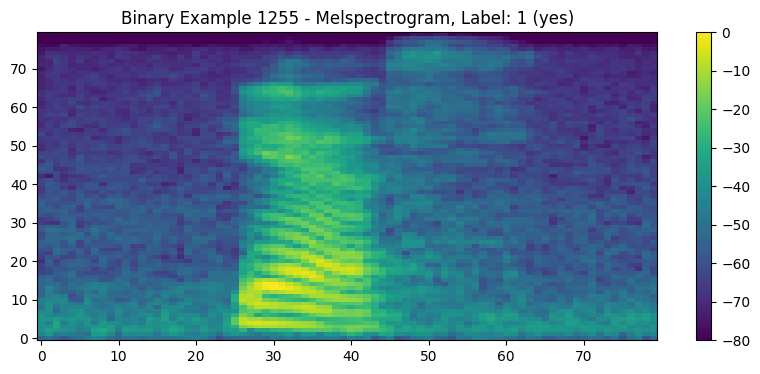

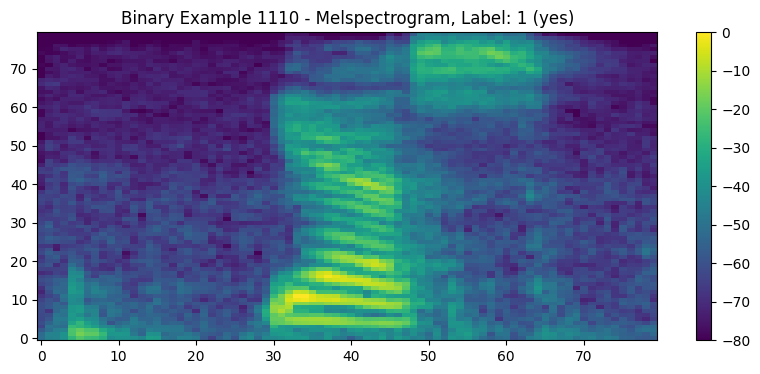

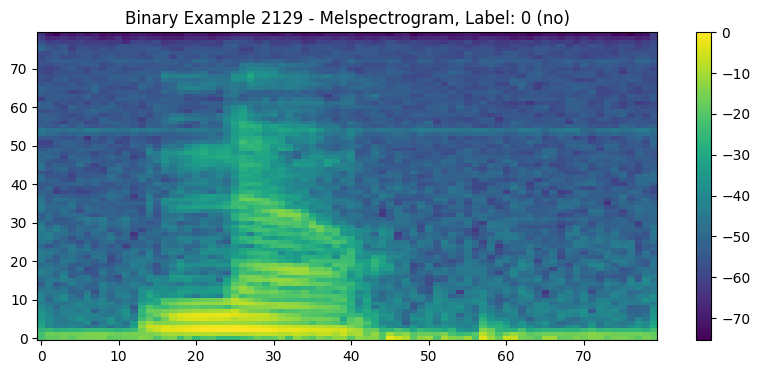

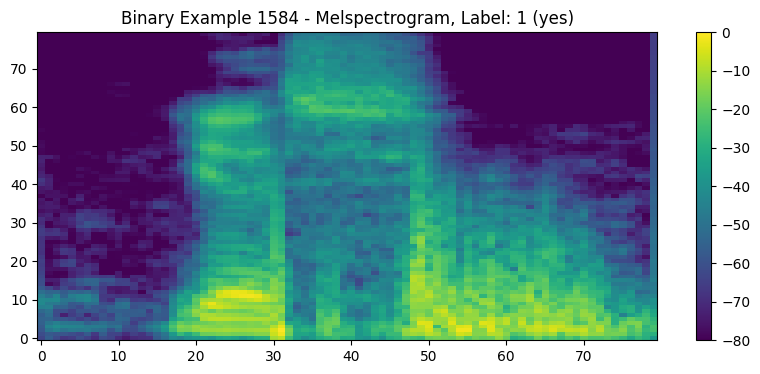

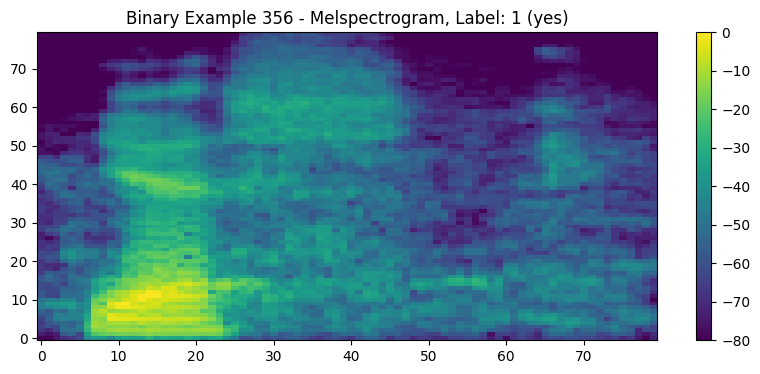

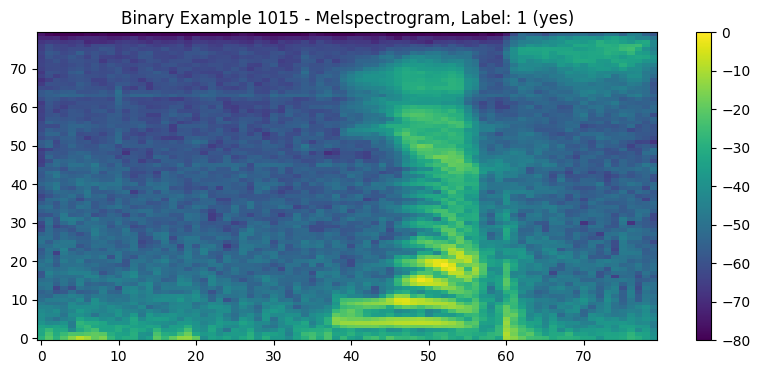

In [30]:
# Test binary mode
cfg.data.yes_no_binary = True
binary_dataset = SpeechCommandsDataset(cfg.data.root, cfg, 'training')

for _ in range(10):
    i = random.randint(0, len(binary_dataset) - 1)
    waveform, label = binary_dataset[i]
    plt.figure(figsize=(10, 4))
    if cfg.data.representation == 'waveform':
        plt.plot(waveform.squeeze())
        plt.title(f"Binary Example {i + 1} - Waveform, Label: {label} ({'yes' if label == 1 else 'no'})")
    else:
        plt.imshow(waveform.squeeze(), aspect='auto', origin='lower')
        plt.title(f"Binary Example {i + 1} - {cfg.data.representation.capitalize()}, Label: {label} ({'yes' if label == 1 else 'no'})")
        plt.colorbar()
    plt.show()